## Model Evaluation and Improvement

To evaluate our supervised models, so far we have split our dataset into a training set
and a test set using the train_test_split function, built a model on the training set
by calling the fit method, and evaluated it on the test set using the score method,
which for classification computes the fraction of correctly classified samples. Here’s
an example of that process:


In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))


Test set score: 0.88


Remember, the reason we split our data into training and test sets is that we are inter‐
ested in measuring how well our model generalizes to new, previously unseen data.
We are not interested in how well our model fit the training set, but rather in how
well it can make predictions for data that was not observed during training.
In this chapter, we will expand on two aspects of this evaluation. We will first intro‐
duce cross-validation, a more robust way to assess generalization performance, and
discuss methods to evaluate classification and regression performance that go beyond
the default measures of accuracy and R
2
 provided by the score method.
We will also discuss grid search, an effective method for adjusting the parameters in
supervised models for the best generalization performance

### Cross-Validation


Cross-validation is a statistical method of evaluating generalization performance that
is more stable and thorough than using a split into a training and a test set. In crossvalidation, the data is instead split repeatedly and multiple models are trained. The
most commonly used version of cross-validation is k-fold cross-validation, where k is
a user-specified number, usually 5 or 10. When performing five-fold cross-validation,
the data is first partitioned into five parts of (approximately) equal size, called folds.
Next, a sequence of models is trained. The first model is trained using the first fold as
the test set, and the remaining folds (2–5) are used as the training set. The model is
built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then
another model is built, this time using fold 2 as the test set and the data in folds 1, 3,
4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets.
For each of these five splits of the data into training and test sets, we compute the
accuracy

In [2]:
import mglearn

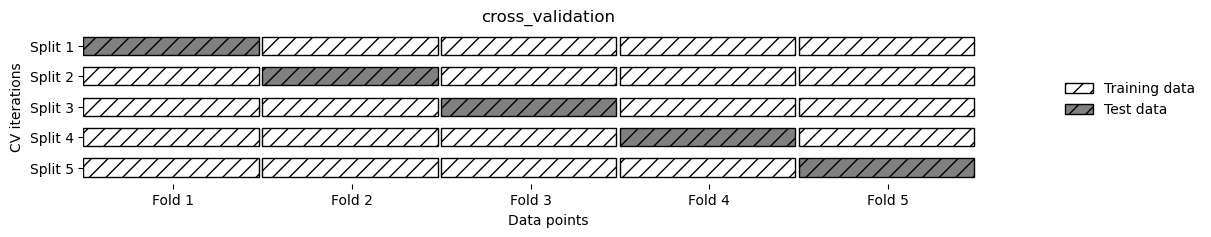

In [3]:
mglearn.plots.plot_cross_validation()
#Data splitting in five-fold cross-validation

Usually, the first fifth of the data is the first fold, the second fifth of the data is the
second fold, and so on.

### Cross-Validation in scikit-learn
Cross-validation is implemented in scikit-learn using the cross_val_score func‐
tion from the model_selection module. The parameters 

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


By default, cross_val_score performs three-fold cross-validation, returning three
accuracy values. We can change the number of folds used by changing the cv parame‐


In [5]:
scores1 = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores1))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


A common way to summarize the cross-validation accuracy is to compute the mean

In [6]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


Using the mean cross-validation we can conclude that we expect the model to be
around 97% accurate on average. Looking at all five scores produced by the five-fold
cross-validation, we can also conclude that there is a relatively high variance in the
accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could
imply that the model is very dependent on the particular folds used for training, but it
could also just be a consequence of the small size of the dataset.

### Benefits of Cross-Validation
There are several benefits to using cross-validation instead of a single split into a
training and a test set. First, remember that train_test_split performs a random
split of the data. Imagine that we are “lucky” when randomly splitting the data, and
all examples that are hard to classify end up in the training set. In that case, the test
set will only contain “easy” examples, and our test set accuracy will be unrealistically
high. Conversely, if we are “unlucky,” we might have randomly put all the hard-toclassify examples in the test set and consequently obtain an unrealistically low score.
However, when using cross-validation, each example will be in the training set exactly
once: each example is in one of the folds, and each fold is the test set once. Therefore,
the model needs to generalize well to all of the samples in the dataset for all of the
cross-validation scores (and their mean) to be high.
Having multiple splits of the data also provides some information about how sensi‐
tive our model is to the selection of the training dataset. For the iris dataset, we saw
accuracies between 90% and 100%. This is quite a range, and it provides us with an
idea about how the model might perform in the worst case and best case scenarios
when applied to new data.
Another benefit of cross-validation as compared to using a single split of the data is
that we use our data more effectively. When using train_test_split, we usually use
75% of the data for training and 25% of the data for evaluation. When using five-fold
cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the
model. When using 10-fold cross-validation, we can use nine-tenths of the data
(90%) to fit the model. More data will usually result in more accurate models.
The main disadvantage of cross-validation is increased computational cost. As we are
now training k models instead of a single model, cross-validation will be roughly k
times slower than doing a single split of the data.

It is important to keep in mind that cross-validation is not a way to
build a model that can be applied to new data. Cross-validation
does not return a model. When calling cross_val_score, multiple
models are built internally, but the purpose of cross-validation is
only to evaluate how well a given algorithm will generalize when
trained on a specific dataset.

### Stratified k-Fold Cross-Validation and Other Strategies

Splitting the dataset into k folds by starting with the first one-k-th part of the data, as
described in the previous section, might not always be a good idea. For example, let’s
have a look at the iris dataset:

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))


Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As you can see, the first third of the data is the class 0, the second third is the class 1,
and the last third is the class 2. Imagine doing three-fold cross-validation on this
dataset. The first fold would be only class 0, so in the first split of the data, the test set
would be only class 0, and the training set would be only classes 1 and 2. As the
classes in training and test sets would be different for all three splits, the three-fold
cross-validation accuracy would be zero on this dataset. That is not very helpful, as
we can do much better than 0% accuracy on iris.
As the simple k-fold strategy fails here, scikit-learn does not use it for classifica‐
tion, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we
split the data such that the proportions between classes are the same in each fold as
they are in the whole dataset,

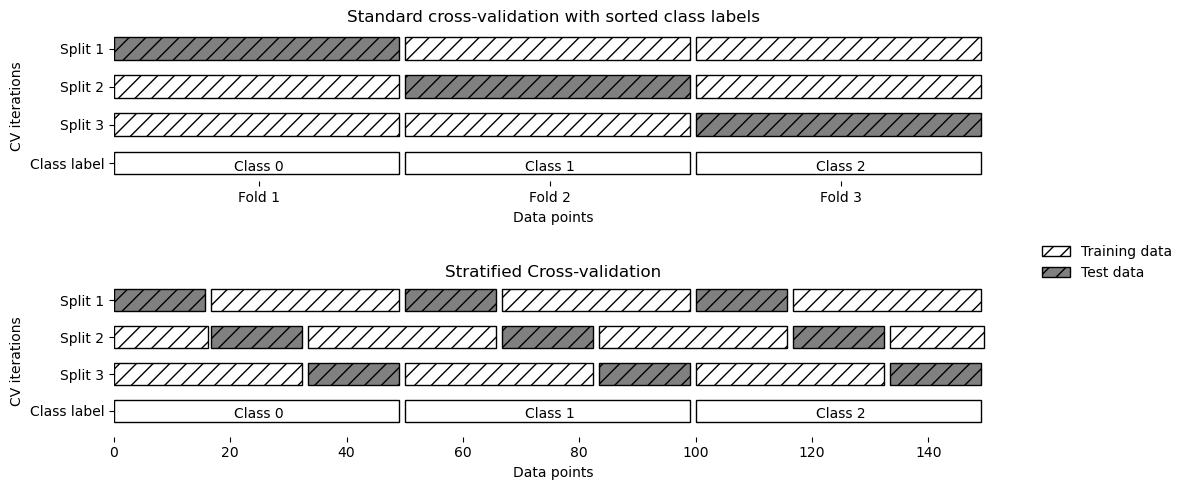

In [8]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()


For example, if 90% of your samples belong to class A and 10% of your samples
belong to class B, then stratified cross-validation ensures that in each fold, 90% of
samples belong to class A and 10% of samples belong to class B.
It is usually a good idea to use stratified k-fold cross-validation instead of k-fold
cross-validation to evaluate a classifier, because it results in more reliable estimates of
generalization performance. In the case of only 10% of samples belonging to class B,
using standard k-fold cross-validation it might easily happen that one fold only con‐
tains samples of class A. Using this fold as a test set would not be very informative
about the overall performance of the classifier.
For regression, scikit-learn uses the standard k-fold cross-validation by default. It
would be possible to also try to make each fold representative of the different values
the regression target has, but this is not a commonly used strategy and would be sur‐
prising to most users

## More control over cross-validation
We saw earlier that we can adjust the number of folds that are used in
cross_val_score using the cv parameter. However, scikit-learn allows for much
finer control over what happens during the splitting of the data by providing a crossvalidation splitter as the cv parameter. For most use cases, the defaults of k-fold crossvalidation for regression and stratified k-fold for classification work well, but there
are some cases where you might want to use a different strategy. Say, for example, we
want to use the standard k-fold cross-validation on a classification dataset to repro‐
duce someone else’s results. To do this, we first have to import the KFold splitter class
from the model_selection module and instantiate it with the number of folds we
want to use:

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)

Then, we can pass the kfold splitter object as the cv parameter to cross_val_score:

In [10]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Remember: each fold corresponds to one of the classes in the iris dataset, and so
nothing can be learned. Another way to resolve this problem is to shuffle the data
instead of stratifying the folds, to remove the ordering of the samples by label. We can
do that by setting the shuffle parameter of KFold to True. If we shuffle the data, we
also need to fix the random_state to get a reproducible shuffling. Otherwise, each run
of cross_val_score would yield a different result, as each time a different split would
be used (this might not be a problem, but can be surprising). Shuffling the data before
splitting it yields a much better result:

In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

### Leave-one-out cross-validation
Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time consuming, particularly for large datasets, but sometimes provides better esti‐
mates on small datasets:

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Number of cv iterations:  150
Mean accuracy: 0.97


### Shuffle-split cross-validation
Another, very flexible strategy for cross-validation is shue-split cross-validation. In
shuffle-split cross-validation, each split samples train_size many points for the
training set and test_size many (disjoint) point for the test set. This splitting is
repeated n_iter times. Figure 5-3 illustrates running four iterations of splitting a
dataset consisting of 10 points, with a training set of 5 points and test sets of 2 points
each (you can use integers for train_size and test_size to use absolute sizes for
these sets, or floating-point numbers to use fractions of the whole dataset):

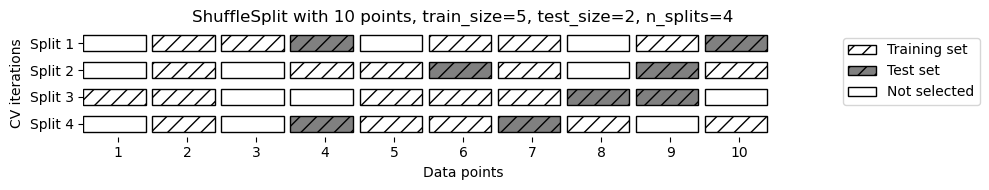

In [14]:
mglearn.plots.plot_shuffle_split()

The following code splits the dataset into 50% training set and 50% test set for 10
iterations:

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96       0.93333333 0.96       0.94666667 0.94666667 0.92
 0.90666667 0.94666667 0.94666667 0.94666667]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Shuffle-split cross-validation allows for control over the number of iterations inde‐
pendently of the training and test sizes, which can sometimes be helpful. It also allows
for using only part of the data in each iteration, by providing train_size and
test_size settings that don’t add up to one. Subsampling the data in this way can be
useful for experimenting with large datasets.
There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleS
plit, which can provide more reliable results for classification tasks

### Cross-validation with groups

Another very common setting for cross-validation is when there are groups in the
data that are highly related. Say you want to build a system to recognize emotions
from pictures of faces, and you collect a dataset of pictures of 100 people where each
person is captured multiple times, showing various emotions. The goal is to build a
classifier that can correctly identify emotions of people not in the dataset. You could
use the default stratified cross-validation to measure the performance of a classifier
here. However, it is likely that pictures of the same person will be in both the training
and the test set. It will be much easier for a classifier to detect emotions in a face that
is part of the training set, compared to a completely new face. To accurately evaluate
the generalization to new faces, we must therefore ensure that the training and test
sets contain images of different people.
To achieve this, we can use GroupKFold, which takes an array of groups as argument
that we can use to indicate which person is in the image. The groups array here indi‐
cates groups in the data that should not be split when creating the training and test
sets, and should not be confused with the class label.
This example of groups in the data is common in medical applications, where you
might have multiple samples from the same patient, but are interested in generalizing
to new patients. Similarly, in speech recognition, you might have multiple recordings
of the same speaker in your dataset, but are interested in recognizing speech of new
speakers.
The following is an example of using a synthetic dataset with a grouping given by the
groups array. The dataset consists of 12 data points, and for each of the data points,
groups specifies which group (think patient) the point belongs to. The groups specify
that there are four groups, and the first three samples belong to the first group, the
next four samples belong to the second group, and so on:

In [24]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

TypeError: cross_val_score() takes from 2 to 3 positional arguments but 4 positional arguments (and 1 keyword-only argument) were given

## Grid Search
Now that we know how to evaluate how well a model generalizes, we can take the
next step and improve the model’s generalization performance by tuning its parame‐
ters. We discussed the parameter settings of many of the algorithms in scikit-learn
in Chapters 2 and 3, and it is important to understand what the parameters mean
before trying to adjust them. Finding the values of the important parameters of a
model (the ones that provide the best generalization performance) is a tricky task, but
necessary for almost all models and datasets. Because it is such a common task, there
are standard methods in scikit-learn to help you with it. The most commonly used
method is grid search, which basically means trying all possible combinations of the
parameters of interest.
Consider the case of a kernel SVM with an RBF (radial basis function) kernel, as
implemented in the SVC class. As we discussed in Chapter 2, there are two important
parameters: the kernel bandwidth, gamma, and the regularization parameter, C. Say we
want to try the values 0.001, 0.01, 0.1, 1, 10, and 100 for the parameter C, and the
same for gamma. Because we have six different settings for C and gamma that we want to
try, we have 36 combinations of parameters in total. Looking at all possible combina‐
tions creates a table (or grid) of parameter settings for the SVM, as shown here

## Simple Grid Search
We can implement a simple grid search just as for loops over the two parameters,
training and evaluating a classifier for each combination

In [25]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(
 X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
 # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
 # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
 # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


## The Danger of Overfitting the Parameters and the Validation Set
Given this result, we might be tempted to report that we found a model that performs
with 97% accuracy on our dataset. However, this claim could be overly optimistic (or
just wrong), for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily
carry over to new data. Because we used the test data to adjust the parameters, we can
no longer use it to assess how good the model is. This is the same reason we needed
to split the data into training and test sets in the first place; we need an independent
dataset to evaluate, one that was not used to create the model.
One way to resolve this problem is to split the data again, so we have three sets: the
training set to build the model, the validation (or development) set to select the
parameters of the model, and the test set to evaluate the performance of the selected
parameters. Figure 5-5 shows what this looks like:


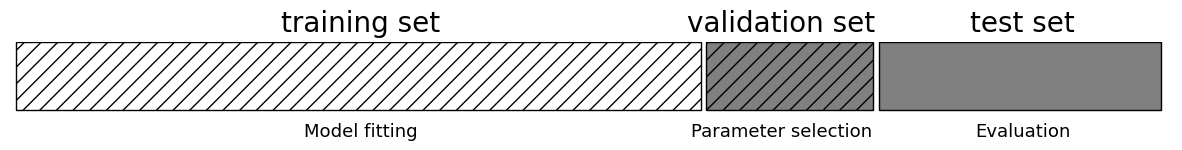

In [26]:
mglearn.plots.plot_threefold_split()

After selecting the best parameters using the validation set, we can rebuild a model
using the parameter settings we found, but now training on both the training data
and the validation data. This way, we can use as much data as possible to build our
model. This leads to the following implementation:

In [28]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
 iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
 X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
 " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    
 # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
 # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
 # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
    # rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


The best score on the validation set is 96%: slightly lower than before, probably
because we used less data to train the model (X_train is smaller now because we split
our dataset twice). However, the score on the test set—the score that actually tells us
how well we generalize—is even lower, at 92%. So we can only claim to classify new
data 92% correctly, not 97% correctly as we thought before!
The distinction between the training set, validation set, and test set is fundamentally
important to applying machine learning methods in practice. Any choices made
based on the test set accuracy “leak” information from the test set into the model.
Therefore, it is important to keep a separate test set, which is only used for the final
evaluation. It is good practice to do all exploratory analysis and model selection using
the combination of a training and a validation set, and reserve the test set for a final
evaluation—this is even true for exploratory visualization. Strictly speaking, evaluat‐
ing more than one model on the test set and choosing the better of the two will result
in an overly optimistic estimate of how accurate the model is

## Grid Search with Cross-Validation
While the method of splitting the data into a training, a validation, and a test set that
we just saw is workable, and relatively commonly used, it is quite sensitive to how
exactly the data is split. From the output of the previous code snippet we can see that
GridSearchCV selects 'C': 10, 'gamma': 0.001 as the best parameters, while the
output of the code in the previous section selects 'C': 100, 'gamma': 0.001 as the
best parameters. For a better estimate of the generalization performance, instead of
using a single split into a training and a validation set, we can use cross-validation to
evaluate the performance of each parameter combination. This method can be coded
up as follows:

In [30]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
 # for each combination of parameters,
 # train an SVC
        svm = SVC(gamma=gamma, C=C)
 # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
 # compute mean cross-validation accuracy
        score = np.mean(scores)
 # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)


SVC(C=10, gamma=0.1)

To evaluate the accuracy of the SVM using a particular setting of C and gamma using
five-fold cross-validation, we need to train 36 * 5 = 180 models. As you can imagine,
the main downside of the use of cross-validation is the time it takes to train all these
models.
The following visualization (Figure 5-6) illustrates how the best parameter setting is
selected in the preceding code:

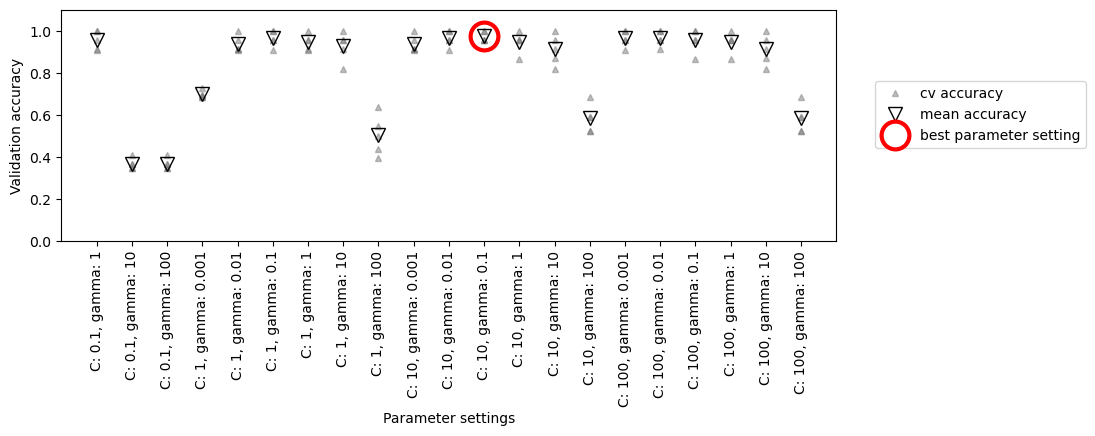

In [31]:
mglearn.plots.plot_cross_val_selection()


For each parameter setting (only a subset is shown), five accuracy values are compu‐
ted, one for each split in the cross-validation. Then the mean validation accuracy is
computed for each parameter setting. The parameters with the highest mean valida‐
tion accuracy are chosen, marked by the circle

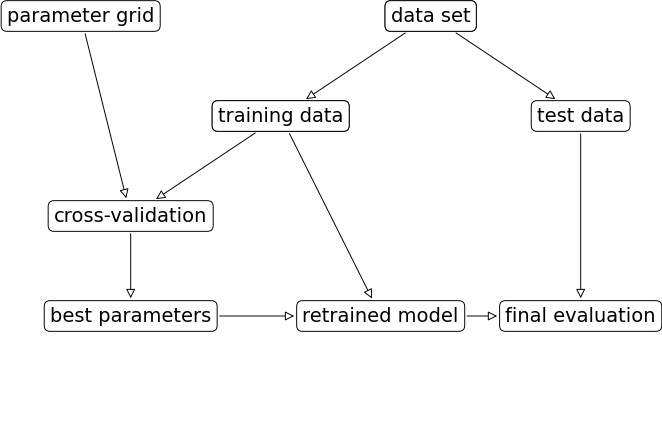

In [32]:
mglearn.plots.plot_grid_search_overview()

Because grid search with cross-validation is such a commonly used method to adjust
parameters, scikit-learn provides the GridSearchCV class, which implements it in
the form of an estimator. To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then per‐
form all the necessary model fits. The keys of the dictionary are the names of parame‐
ters we want to adjust (as given when constructing the model—in this case, C and
gamma), and the values are the parameter settings we want to try out. Trying the val‐
ues 0.001, 0.01, 0.1, 1, 10, and 100 for C and gamma translates to the following
dictionar

In [33]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


We can now instantiate the GridSearchCV class with the model (SVC), the parameter
grid to search (param_grid), and the cross-validation strategy we want to use (say,
five-fold stratified cross-validation):

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

GridSearchCV will use cross-validation in place of the split into a training and valida‐
tion set that we used before. However, we still need to split the data into a training
and a test set, to avoid overfitting the parameters

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)

The grid_search object that we created behaves just like a classifier; we can call the
standard methods fit, predict, and score on it.1
 However, when we call fit, it will
run cross-validation for each combination of parameters we specified in param_grid:

In [37]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance. What happens in fit is therefore
equivalent to the result of the In[21] code we saw at the beginning of this section. The
GridSearchCV class provides a very convenient interface to access the retrained
model using the predict and score methods. To evaluate how well the best found
parameters generalize, we can call score on the test set:

In [38]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


Choosing the parameters using cross-validation, we actually found a model that ach‐
ieves 97% accuracy on the test set. The important thing here is that we did not use the
test set to choose the parameters. The parameters that were found are scored in the best_params_ attribute, and the best cross-validation accuracy (the mean accuracy
over the different splits for this parameter setting) is stored in best_score_:

In [39]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


Again, be careful not to confuse best_score_ with the generaliza‐
tion performance of the model as computed by the score method
on the test set. Using the score method (or evaluating the output of
the predict method) employs a model trained on the whole train‐
ing set. The best_score_ attribute stores the mean cross-validation
accuracy, with cross-validation performed on the training set

Sometimes it is helpful to have access to the actual model that was found—for exam‐
ple, to look at coefficients or feature importances. You can access the model with the
best parameters trained on the whole training set using the best_estimator_
attribute:

In [40]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Best estimator:
SVC(C=10, gamma=0.1)


Because grid_search itself has predict and score methods, using best_estimator_
is not needed to make predictions or evaluate the model

## Analyzing the result of cross-validation
It is often helpful to visualize the results of cross-validation, to understand how the
model generalization depends on the parameters we are searching. As grid searches
are quite computationally expensive to run, often it is a good idea to start with a rela‐
tively coarse and small grid. We can then inspect the results of the cross-validated
grid search, and possibly expand our search. The results of a grid search can be found
in the cv_results_ attribute, which is a dictionary storing all aspects of the search. It contains a lot of details, as you can see in the following output, and is best looked at
after converting it to a pandas DataFrame

In [41]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001717,0.000569,0.000436,0.000524,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001047,0.000683,0.000411,0.000503,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.003227,0.003952,0.001564,0.003127,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.002688,0.002975,0.000230,0.000461,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001402,0.002804,0.000000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


Each row in results corresponds to one particular parameter setting. For each set‐
ting, the results of all cross-validation splits are recorded, as well as the mean and
standard deviation over all splits. As we were searching a two-dimensional grid of
parameters (C and gamma), this is best visualized as a heat map (Figure 5-8). First we
extract the mean validation scores, then we reshape the scores so that the axes corre‐
spond to C and gamma:

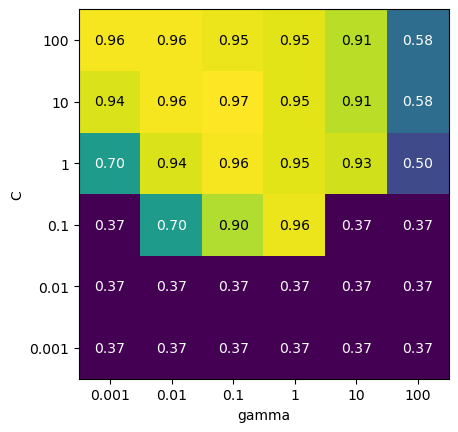

In [45]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
 ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

Each point in the heat map corresponds to one run of cross-validation, with a partic‐
ular parameter setting. The color encodes the cross-validation accuracy, with light
colors meaning high accuracy and dark colors meaning low accuracy. You can see
that SVC is very sensitive to the setting of the parameters. For many of the parameter
settings, the accuracy is around 40%, which is quite bad; for other settings the accu‐
racy is around 96%. We can take away from this plot several things. First, the parame‐
ters we adjusted are very important for obtaining good performance. Both parameters
(C and gamma) matter a lot, as adjusting them can change the accuracy from 40% to
96%. Additionally, the ranges we picked for the parameters are ranges in which we
see significant changes in the outcome. It’s also important to note that the ranges for
the parameters are large enough: the optimum values for each parameter are not on
the edges of the plot

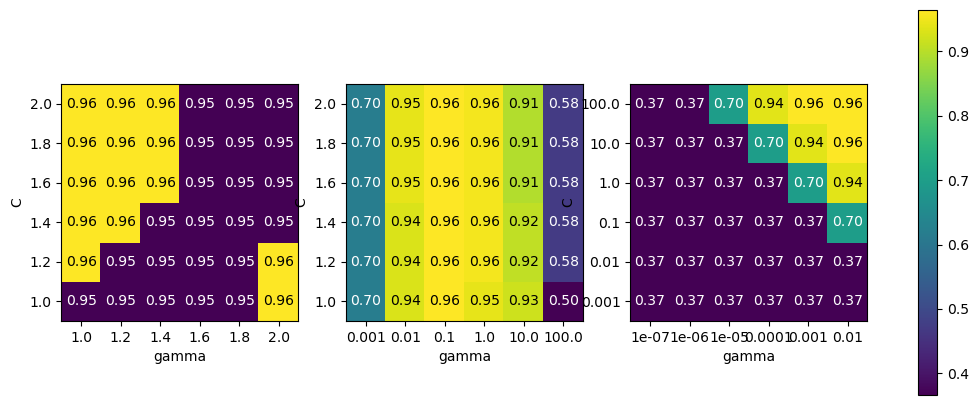

In [47]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
 'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
 # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

### Search over spaces that are not grids
In some cases, trying all possible combinations of all parameters as GridSearchCV
usually does, is not a good idea. For example, SVC has a kernel parameter, and
depending on which kernel is chosen, other parameters will be relevant. If ker
nel='linear', the model is linear, and only the C parameter is used. If kernel='rbf',
both the C and gamma parameters are used (but not other parameters like degree). In
this case, searching over all possible combinations of C, gamma, and kernel wouldn’t
make sense: if kernel='linear', gamma is not used, and trying different values for
gamma would be a waste of time. To deal with these kinds of “conditional” parameters,
GridSearchCV allows the param_grid to be a list of dictionaries. Each dictionary in the
list is expanded into an independent grid. A possible grid search involving kernel and
parameters could look like this:


In [48]:
param_grid = [{'kernel': ['rbf'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In the first grid, the kernel parameter is always set to 'rbf' (not that the entry for
kernel is a list of length one), and both the C and gamma parameters are varied. In the
second grid, the kernel parameter is always set to linear, and only C is varied. Now
let’s apply this more complex parameter search:

In [49]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [50]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000818,0.003067,0.001601,0.004204,0.0,0.002746,0.001692,0.003125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003126,0.0,0.0,0.0
std_fit_time,0.000768,0.003765,0.003202,0.003737,0.0,0.003439,0.003385,0.00625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006251,0.0,0.0,0.0
mean_score_time,0.000415,0.0001,0.001599,0.000963,0.000573,0.0,0.0,0.0,0.0,0.003124,...,0.0,0.003125,0.0,0.003124,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.000508,0.000124,0.003198,0.001182,0.001147,0.0,0.0,0.0,0.0,0.006249,...,0.0,0.006249,0.0,0.006247,0.0,0.0,0.0,0.0,0.0,0.0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


## Using different cross-validation strategies with grid search
Similarly to cross_val_score, GridSearchCV uses stratified k-fold cross-validation
by default for classification, and k-fold cross-validation for regression. However, you
can also pass any cross-validation splitter, as described in “More control over crossvalidation” on page 256, as the cv parameter in GridSearchCV. In particular, to get
only a single split into a training and a validation set, you can use ShuffleSplit or
StratifiedShuffleSplit with n_iter=1. This might be helpful for very large data‐
sets, or very slow models
## Nested cross-validation
In the preceding examples, we went from using a single split of the data into training,
validation, and test sets to splitting the data into training and test sets and then per‐
forming cross-validation on the training set. But when using GridSearchCV as
described earlier, we still have a single split of the data into training and test sets,
which might make our results unstable and make us depend too much on this single
split of the data. We can go a step further, and instead of splitting the original data
into training and test sets once, use multiple splits of cross-validation. This will result
in what is called nested cross-validation. In nested cross-validation, there is an outer
loop over splits of the data into training and test sets. For each of them, a grid search
is run (which might result in different best parameters for each split in the outer
loop). Then, for each outer split, the test set score using the best settings is reported.
The result of this procedure is a list of scores—not a model, and not a parameter set‐
ting. The scores tell us how well a model generalizes, given the best parameters found
by the grid. As it doesn’t provide a model that can be used on new data, nested crossvalidation is rarely used when looking for a predictive model to apply to future data.
However, it can be useful for evaluating how well a given model works on a particular
dataset.
Implementing nested cross-validation in scikit-learn is straightforward. We call
cross_val_score with an instance of GridSearchCV as the model:

In [51]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
 iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


## Evaluation Metrics and Scoring


So far, we have evaluated classification performance using accuracy (the fraction of
correctly classified samples) and regression performance using R
2
. However, these are
only two of the many possible ways to summarize how well a supervised model per‐
forms on a given dataset. In practice, these evaluation metrics might not be appropri‐
ate for your application, and it is important to choose the right metric when selecting
between models and adjusting parameters
## Keep the End Goal in Mind
When selecting a metric, you should always have the end goal of the machine learn‐
ing application in mind. In practice, we are usually interested not just in making
accurate predictions, but in using these predictions as part of a larger decisionmaking process. Before picking a machine learning metric, you should think about
the high-level goal of the application, often called the business metric. The conse‐
quences of choosing a particular algorithm for a machine learning application are called the business impact.
2
 Maybe the high-level goal is avoiding traffic accidents, or
decreasing the number of hospital admissions. It could also be getting more users for
your website, or having users spend more money in your shop. When choosing a
model or adjusting parameters, you should pick the model or parameter values that
have the most positive influence on the business metric. Often this is hard, as assess‐
ing the business impact of a particular model might require putting it in production
in a real-life system.
In the early stages of development, and for adjusting parameters, it is often infeasible
to put models into production just for testing purposes, because of the high business
or personal risks that can be involved. Imagine evaluating the pedestrian avoidance
capabilities of a self-driving car by just letting it drive around, without verifying it
first; if your model is bad, pedestrians will be in trouble! Therefore we often need to
find some surrogate evaluation procedure, using an evaluation metric that is easier to
compute. For example, we could test classifying images of pedestrians against nonpedestrians and measure accuracy. Keep in mind that this is only a surrogate, and it
pays off to find the closest metric to the original business goal that is feasible to evalu‐
ate. This closest metric should be used whenever possible for model evaluation and
selection. The result of this evaluation might not be a single number—the conse‐
quence of your algorithm could be that you have 10% more customers, but each cus‐
tomer will spend 15% less—but it should capture the expected business impact of
choosing one model over another.
In this section, we will first discuss metrics for the important special case of binary
classification, then turn to multiclass classification and finally regression.
###  Metrics for Binary Classification
Binary classification is arguably the most common and conceptually simple applica‐
tion of machine learning in practice. However, there are still a number of caveats in
evaluating even this simple task. Before we dive into alternative metrics, let’s have a
look at the ways in which measuring accuracy might be misleading. Remember that
for binary classification, we often speak of a positive class and a negative class, with
the understanding that the positive class is the one we are looking for.
### Kinds of errors
Often, accuracy is not a good measure of predictive performance, as the number of
mistakes we make does not contain all the information we are interested in. Imagine
an application to screen for the early detection of cancer using an automated test. If the test is negative, the patient will be assumed healthy, while if the test is positive, the
patient will undergo additional screening. Here, we would call a positive test (an indi‐
cation of cancer) the positive class, and a negative test the negative class. We can’t
assume that our model will always work perfectly, and it will make mistakes. For any
application, we need to ask ourselves what the consequences of these mistakes might
be in the real world.
One possible mistake is that a healthy patient will be classified as positive, leading to
additional testing. This leads to some costs and an inconvenience for the patient (and
possibly some mental distress). An incorrect positive prediction is called a false posi‐
tive. The other possible mistake is that a sick patient will be classified as negative, and
will not receive further tests and treatment. The undiagnosed cancer might lead to
serious health issues, and could even be fatal. A mistake of this kind—an incorrect
negative prediction—is called a false negative. In statistics, a false positive is also
known as type I error, and a false negative as type II error. We will stick to “false nega‐
tive” and “false positive,” as they are more explicit and easier to remember. In the can‐
cer diagnosis example, it is clear that we want to avoid false negatives as much as
possible, while false positives can be viewed as more of a minor nuisance.
While this is a particularly drastic example, the consequence of false positives and
false negatives are rarely the same. In commercial applications, it might be possible to
assign dollar values to both kinds of mistakes, which would allow measuring the error
of a particular prediction in dollars, instead of accuracy. This might be much more
meaningful for making business decisions on which model to use.
##  Imbalanced datasets
Types of errors play an important role when one of two classes is much more frequent
than the other one. This is very common in practice; a good example is click-through
prediction, where each data point represents an “impression,” an item that was shown
to a user. This item might be an ad, or a related story, or a related person to follow on
a social media site. The goal is to predict whether, if shown a particular item, a user
will click on it (indicating they are interested). Most things users are shown on the
Internet (in particular, ads) will not result in a click. You might need to show a user
100 ads or articles before they find something interesting enough to click on. This
results in a dataset where for each 99 “no click” data points, there is 1 “clicked” data
point; in other words, 99% of the samples belong to the “no click” class. Datasets in
which one class is much more frequent than the other are often called imbalanced
datasets, or datasets with imbalanced classes. In reality, imbalanced data is the norm,
and it is rare that the events of interest have equal or even similar frequency in the
data.
Now let’s say you build a classifier that is 99% accurate on the click prediction task.
What does that tell you? 99% accuracy sounds impressive, but this doesn’t take the class imbalance into account. You can achieve 99% accuracy without building a
machine learning model, by always predicting “no click.” On the other hand, even
with imbalanced data, a 99% accurate model could in fact be quite good. However,
accuracy doesn’t allow us to distinguish the constant “no click” model from a poten‐
tially good model.

To illustrate, we’ll create a 9:1 imbalanced dataset from the digits dataset, by classify‐
ing the digit 9 against the nine other classes:


In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)

We can use the DummyClassifier to always predict the majority class (here
“not nine”) to see how uninformative accuracy can be:

In [55]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))


Unique predicted labels: [False]
Test score: 0.90


We obtained close to 90% accuracy without learning anything. This might seem strik‐
ing, but think about it for a minute. Imagine someone telling you their model is 90%
accurate. You might think they did a very good job. But depending on the problem,
that might be possible by just predicting one class! Let’s compare this against using an
actual classifier:

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


According to accuracy, the DecisionTreeClassifier is only slightly better than the
constant predictor. This could indicate either that something is wrong with how we
used DecisionTreeClassifier, or that accuracy is in fact not a good measure here.
For comparison purposes, let’s evaluate two more classifiers, LogisticRegression
and the default DummyClassifier, which makes random predictions but produces
classes with the same proportions as in the training set

In [57]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The dummy classifier that produces random output is clearly the worst of the lot
(according to accuracy), while LogisticRegression produces very good results.
However, even the random classifier yields over 80% accuracy. This makes it very
hard to judge which of these results is actually helpful. The problem here is that accu‐
racy is an inadequate measure for quantifying predictive performance in this imbal‐
anced setting. For the rest of this chapter, we will explore alternative metrics that
provide better guidance in selecting models. In particular, we would like to have met‐
rics that tell us how much better a model is than making “most frequent” predictions
or random predictions, as they are computed in pred_most_frequent and
pred_dummy. If we use a metric to assess our models, it should definitely be able to
weed out these nonsense predictions.

## Confusion matrices
One of the most comprehensive ways to represent the result of evaluating binary clas‐
sification is using confusion matrices. Let’s inspect the predictions of LogisticRegres
sion from the previous section using the confusion_matrix function. We already
stored the predictions on the test set in pred_logreg:

In [60]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))


Confusion matrix:
[[402   1]
 [  6  41]]


The output of confusion_matrix is a two-by-two array, where the rows correspond
to the true classes and the columns correspond to the predicted classes. Each entry
counts how often a sample that belongs to the class corresponding to the row (here,
“not nine” and “nine”) was classified as the class corresponding to the column. The
following plot (Figure 5-10) illustrates this meaning:

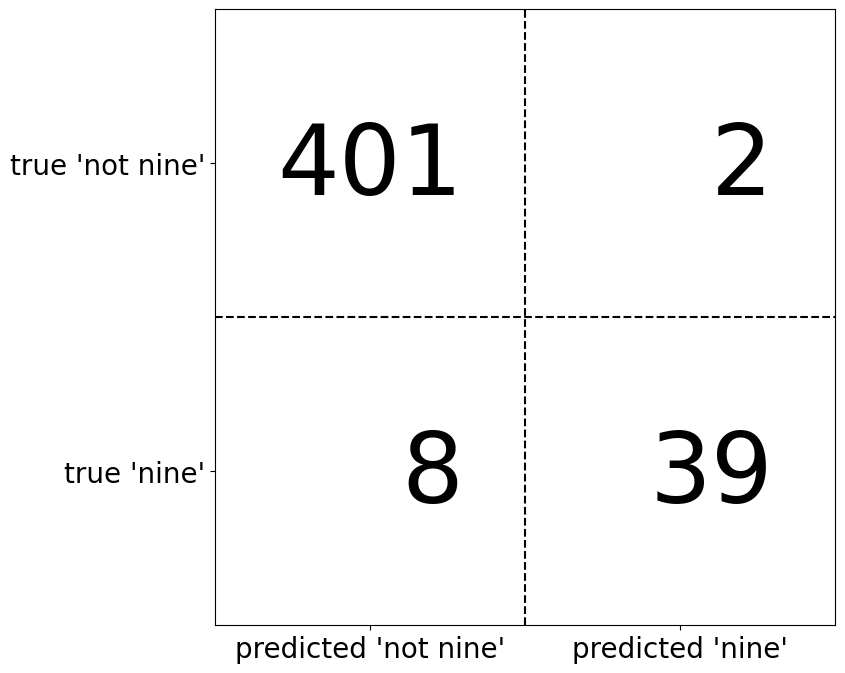

In [59]:
mglearn.plots.plot_confusion_matrix_illustration()

Entries on the main diagonal3
 of the confusion matrix correspond to correct classifi‐
cations, while other entries tell us how many samples of one class got mistakenly clas‐
sified as another class.
If we declare “a nine” the positive class, we can relate the entries of the confusion
matrix with the terms false positive and false negative that we introduced earlier. To
complete the picture, we call correctly classified samples belonging to the positive
class true positives and correctly classified samples belonging to the negative class true
negatives. These terms are usually abbreviated FP, FN, TP, and TN and lead to the fol‐
lowing interpretation for the confusion matrix (Figure 5-11):

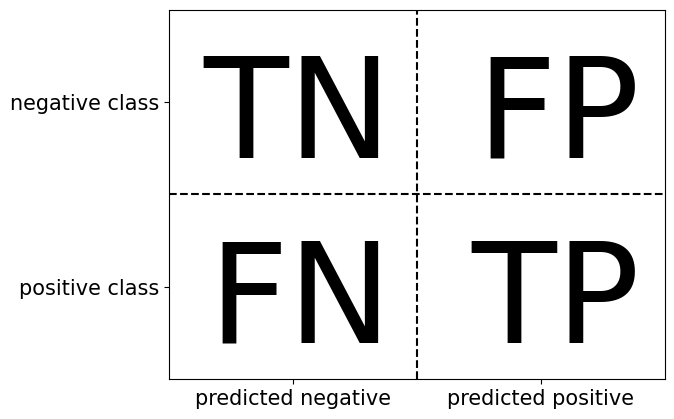

In [61]:
mglearn.plots.plot_binary_confusion_matrix()

Now let’s use the confusion matrix to compare the models we fitted earlier (the two
dummy models, the decision tree, and the logistic regression)

In [62]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))


Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


Looking at the confusion matrix, it is quite clear that something is wrong with
pred_most_frequent, because it always predicts the same class. pred_dummy, on the
other hand, has a very small number of true positives (4), particularly compared to
the number of false negatives and false positives—there are many more false positives
than true positives! The predictions made by the decision tree make much more
sense than the dummy predictions, even though the accuracy was nearly the same.
Finally, we can see that logistic regression does better than pred_tree in all aspects: it
has more true positives and true negatives while having fewer false positives and false
negatives. From this comparison, it is clear that only the decision tree and the logistic
regression give reasonable results, and that the logistic regression works better than
the tree on all accounts. However, inspecting the full confusion matrix is a bit cum‐
bersome, and while we gained a lot of insight from looking at all aspects of the
matrix, the process was very manual and qualitative. There are several ways to sum‐
marize the information in the confusion matrix, which we will discuss next

In [ ]:
#### accuracy
is the number of correct predictions (TP and TN) divided
by the number of all samples (all entries of the confusion matrix summed up).
#### Precision, recall, and f-score.
There are several other ways to summarize the confusion
matrix, with the most common ones being precision and recall.
#### Precision measures
how many of the samples predicted as positive are actually positive: